<a href="https://colab.research.google.com/github/valmyr/-SystemVerilog-para-treinamento-de-design-e-verifica-o/blob/main/Course%202%20-%20Part%208%20-%20Lesson%202%20-%20Notebook%20(RockPaperScissors).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [8]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps.zip \
    -O /tmp/rps.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2025-04-08 23:52:20--  https://storage.googleapis.com/learning-datasets/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.20.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   256MB/s    in 0.7s    

2025-04-08 23:52:21 (256 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2025-04-08 23:52:21--  https://storage.googleapis.com/learning-datasets/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.20.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rps-tes

In [9]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [10]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock02-055.png', 'rock05ck01-042.png', 'rock04-105.png', 'rock04-001.png', 'rock06ck02-023.png', 'rock06ck02-058.png', 'rock04-042.png', 'rock02-056.png', 'rock04-046.png', 'rock07-k03-028.png']
['paper01-085.png', 'paper06-117.png', 'paper02-008.png', 'paper03-047.png', 'paper04-065.png', 'paper07-004.png', 'paper04-082.png', 'paper05-066.png', 'paper01-028.png', 'paper04-086.png']
['testscissors02-117.png', 'scissors01-075.png', 'scissors03-017.png', 'scissors01-054.png', 'testscissors03-034.png', 'scissors01-069.png', 'testscissors01-007.png', 'scissors02-109.png', 'scissors02-101.png', 'testscissors03-015.png']


In [5]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.1 MB/s eta 0:00:00


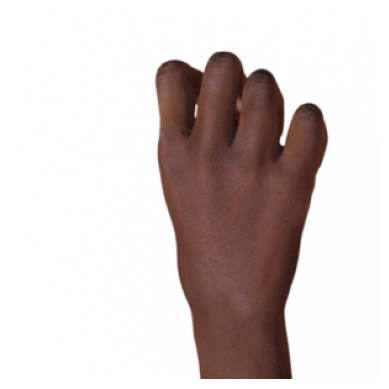

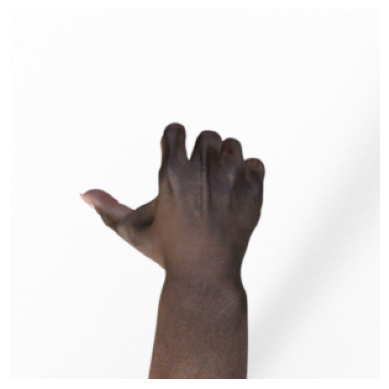

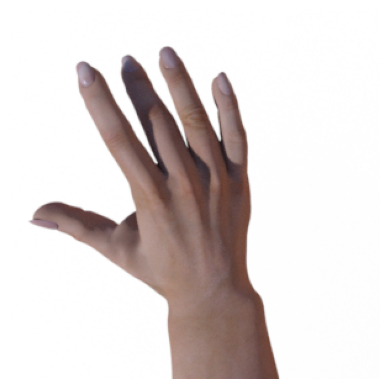

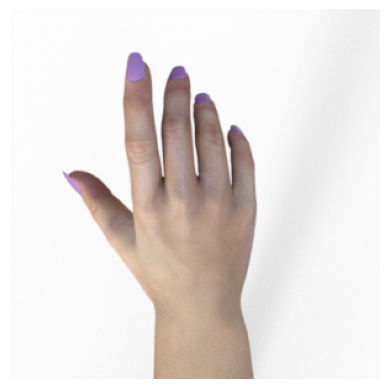

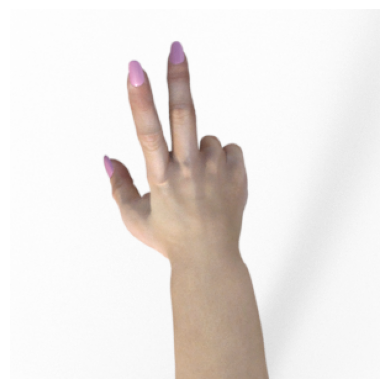

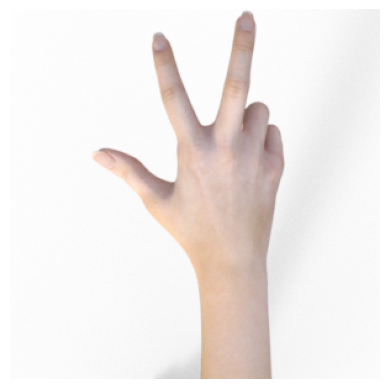

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.3290 - loss: 1.2136 - val_accuracy: 0.3333 - val_loss: 1.0960
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3706 - loss: 1.0964 - val_accuracy: 0.3548 - val_loss: 1.0499
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4138 - loss: 1.1285 - val_accuracy: 0.6263 - val_loss: 0.9391
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4887 - loss: 0.9930 - val_accuracy: 0.7419 - val_loss: 0.7254
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5670 - loss: 0.8694 - val_accuracy: 0.5645 - val_loss: 0.7943
Epoch 6/25
14/20 ━━━━━━━━━━━━━━━━━━━━ 5s 969ms/step - accuracy: 0.5295 - loss: 1.0203

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [3]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00


In [4]:
import numpy as np
from google.colab import files
import random as rd
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image


In [16]:
model1 = tf.keras.models.load_model("/content/vrps.h5")

In [22]:

# from keras_preprocessing.image import ImageDataGeneratormode
for fn in range(100):

  # predicting images
  index = rd.randint(0,30)
  k= rd.randint(0,2)
  index = (3-len(str(index)))*'0'+str(index)
  string = ["paper","rock","scissors"]
  print(index)
  path = f"/tmp/rps/{string[k]}/{string[k]}01-{index}.png"
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model1.predict(x, batch_size=10)

  if(int(classes[0][0])==1):
    clas =0
  elif((classes[0][1])==1):
    clas =  1
  else:
    clas = 2
  print(classes[0],clas,k)
  if(string[clas]==string[k]):
    print("Pass")
  else:
    print("Fail")
    print(fn)
    break

002
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0. 1. 0.] 1 1
Pass
015
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0. 0. 1.] 2 2
Pass
013
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[1. 0. 0.] 0 0
Pass
011
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[1. 0. 0.] 0 0
Pass
019
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0. 1. 0.] 1 1
Pass
000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[0. 0. 1.] 2 2
Pass
011
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[1. 0. 0.] 0 0
Pass
005
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[1. 0. 0.] 0 0
Pass
016
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[1. 0. 0.] 0 0
Pass
029
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0. 0. 1.] 2 2
Pass
024
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[1. 0. 0.] 0 0
Pass
030
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[0. 0. 1.] 2 2
Pass
030
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0. 1. 0.] 1 1
Pass
001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[0. 0. 1.] 2 2
Pass
013
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[1. 0. 0.] 0 0
Pass
007
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[0. 1. 0.] 1 1
Pass
004
1/1 